# 以平均氣壓、溫度、濕度、風速預測是否下雨

In [357]:
import pandas as pd
import glob
import numpy as np

## 匯入資料並合併成一個資料表
### (從2015年7月到2018年6月)

In [358]:
filenames = glob.glob('觀測資料/*.csv')
dfs = []
for filename in filenames:
    try:
        dfs.append(pd.read_csv(filename))
    except:
        pass
df = pd.concat(dfs, ignore_index=True)
df.head()

,序號,測站,監測日期,監測時間,測站氣壓(hPa),溫度(℃),相對溼度(%),風向,風速(m/s),降水量(mm),日照時數(小時)
0,1.0,嘉義,2017/10/07,23:10:00,"1,008.3",28.2,80,靜風,0,0,-
1,2.0,嘉義,2017/10/07,22:10:00,"1,008.5",28.7,82,西南西,0.5,0,-
2,3.0,嘉義,2017/10/07,21:10:00,"1,008.2",28.2,83,靜風,0.2,0,-
3,4.0,嘉義,2017/10/07,20:10:00,"1,008",29.3,78,西北西,1.7,0,-
4,5.0,嘉義,2017/10/07,19:10:00,"1,007",30,75,靜風,0.1,0,0


## 將空值( - )轉為( )

In [359]:
df.replace('-', '', inplace=True)
df.head()

,序號,測站,監測日期,監測時間,測站氣壓(hPa),溫度(℃),相對溼度(%),風向,風速(m/s),降水量(mm),日照時數(小時)
0,1.0,嘉義,2017/10/07,23:10:00,"1,008.3",28.2,80,靜風,0,0,
1,2.0,嘉義,2017/10/07,22:10:00,"1,008.5",28.7,82,西南西,0.5,0,
2,3.0,嘉義,2017/10/07,21:10:00,"1,008.2",28.2,83,靜風,0.2,0,
3,4.0,嘉義,2017/10/07,20:10:00,"1,008",29.3,78,西北西,1.7,0,
4,5.0,嘉義,2017/10/07,19:10:00,"1,007",30,75,靜風,0.1,0,0


## 產生一天中是否有下雨的Label

In [360]:
df1 = df.groupby(['測站','監測日期'])['降水量(mm)'].sum().reset_index()
df1.head()

,測站,監測日期,降水量(mm)
0,嘉義,2015/07/01,0
1,嘉義,2015/07/02,0
2,嘉義,2015/07/03,0
3,嘉義,2015/07/04,0
4,嘉義,2015/07/05,3


In [361]:
df2 = df.merge(df1, on=['測站','監測日期'], how='left').rename(columns={'降水量(mm)_x':'降水量(mm)', '降水量(mm)_y':'label'})
df2.dropna(how='all', inplace=True)
df2 = df2.replace('', np.nan).fillna(0)
df2['測站氣壓(hPa)'] = df2['測站氣壓(hPa)'].str.replace(',', '')
df2.dropna(inplace=True)
df3 = df2[['測站氣壓(hPa)','溫度(℃)','相對溼度(%)', '風速(m/s)']].astype('float')

## 將兩個資料合併

In [362]:
df2 = df.merge(df1, on=['測站','監測日期'], how='left').rename(columns={'降水量(mm)_x':'降水量(mm)', '降水量(mm)_y':'label'})
df2.head()

,序號,測站,監測日期,監測時間,測站氣壓(hPa),溫度(℃),相對溼度(%),風向,風速(m/s),降水量(mm),日照時數(小時),label
0,1.0,嘉義,2017/10/07,23:10:00,"1,008.3",28.2,80,靜風,0,0,,0
1,2.0,嘉義,2017/10/07,22:10:00,"1,008.5",28.7,82,西南西,0.5,0,,0
2,3.0,嘉義,2017/10/07,21:10:00,"1,008.2",28.2,83,靜風,0.2,0,,0
3,4.0,嘉義,2017/10/07,20:10:00,"1,008",29.3,78,西北西,1.7,0,,0
4,5.0,嘉義,2017/10/07,19:10:00,"1,007",30,75,靜風,0.1,0,0,0


## 將資料欄位進行處理

In [378]:
# 刪除多的列
df2.dropna(how='all', inplace=True)
# 將空值補零
df2 = df2.replace('', np.nan).fillna(0)
# 將數值中的逗號去除
df2['測站氣壓(hPa)'] = df2['測站氣壓(hPa)'].str.replace(',', '')

## 取用需要的欄位

In [379]:
df3 = df2[['測站氣壓(hPa)','溫度(℃)','相對溼度(%)', '風速(m/s)']].astype('float')
df3.head()

,測站氣壓(hPa),溫度(℃),相對溼度(%),風速(m/s)
0,1008.3,28.2,80.0,0.0
1,1008.5,28.7,82.0,0.5
2,1008.2,28.2,83.0,0.2
3,1008.0,29.3,78.0,1.7
4,1007.0,30.0,75.0,0.1


# Decission Tree

In [380]:
x = df3.values
y = df2.iloc[:,-1].values

In [382]:
# 將Label轉為(0,1)
y[y !=0] =1

In [383]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [384]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# 建立分類器
clf = DecisionTreeClassifier(criterion='entropy',max_depth=4)
clf.fit(x_train, y_train)

# 預測
y_test_predicted = clf.predict(x_test)

clf.score(x_test,y_test)
print(classification_report(y_test,y_test_predicted))

              precision    recall  f1-score   support

         0.0       0.67      0.80      0.73     78629
         1.0       0.65      0.49      0.56     61195

    accuracy                           0.66    139824
   macro avg       0.66      0.64      0.64    139824
weighted avg       0.66      0.66      0.65    139824



In [385]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

data_feature_name = list(df3)
data_target_name = ['0','1']

dot_tree = export_graphviz(clf,out_file=None,feature_names=data_feature_name,class_names=data_target_name,filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_tree)
img = Image(graph.create_png())

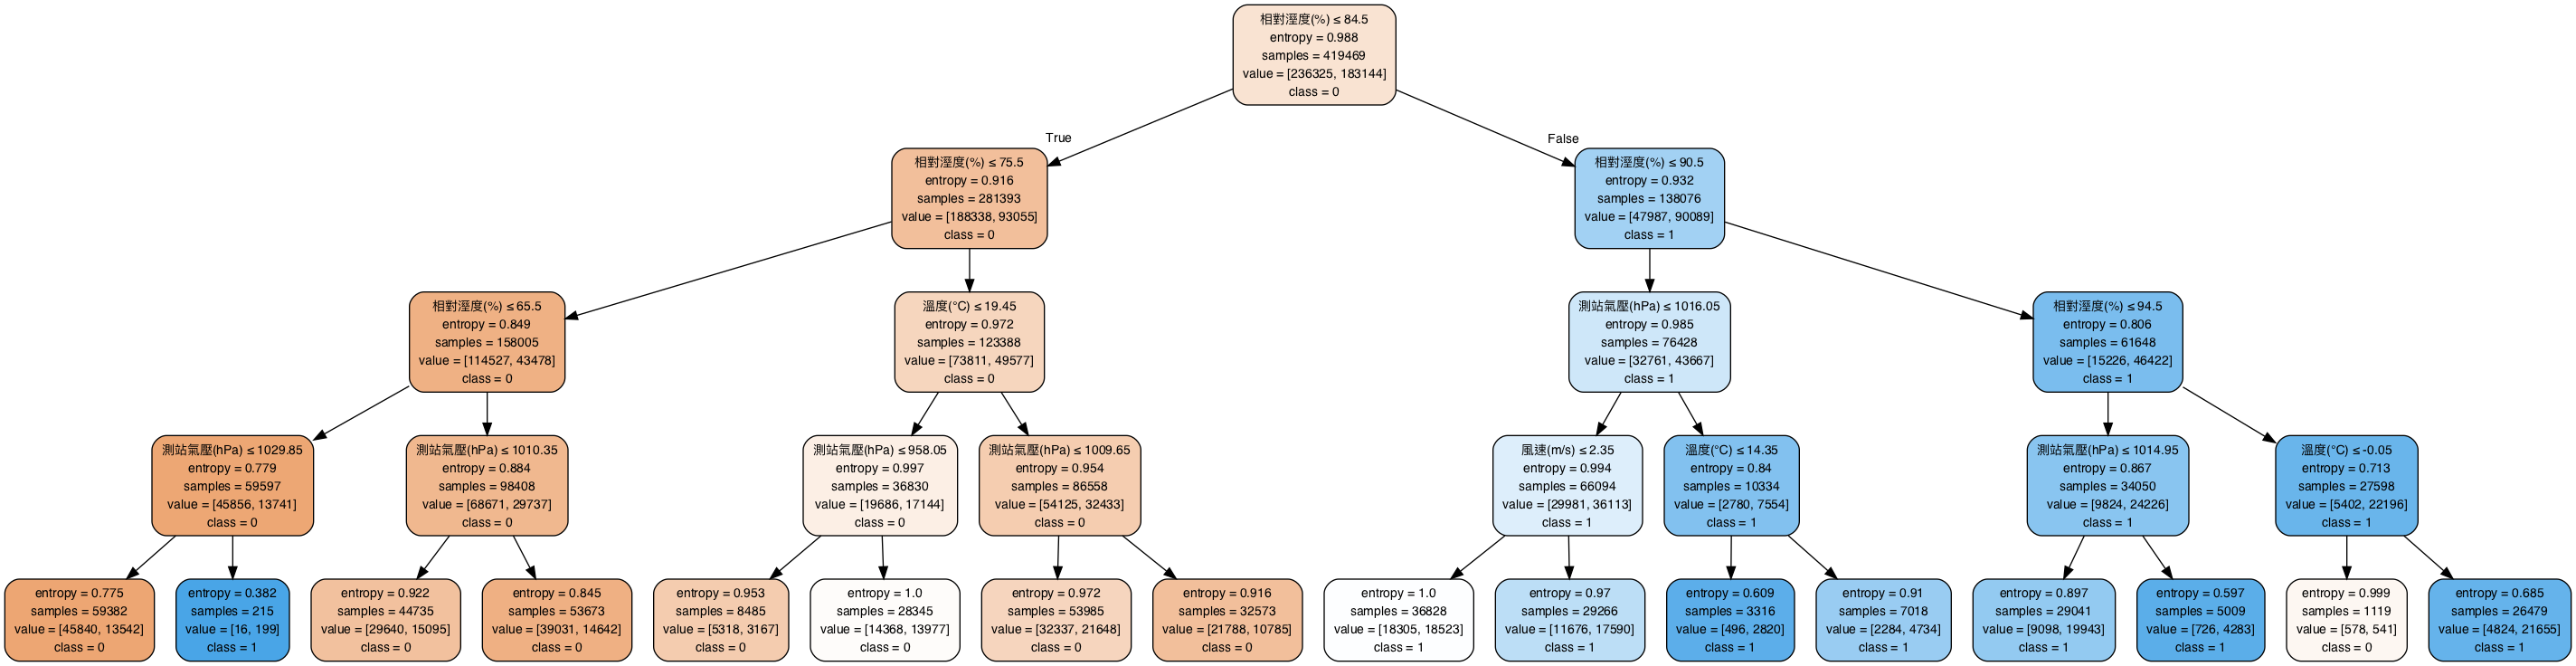

In [386]:
img